# Derivatives of the $\Lambda$ function

#### Validation of the derivatives of the $\Lambda$ function for linearly limb-darkened transits

Let's import some stuff.

In [1]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib notebook
from IPython.display import display, Math
import sympy
from sympy import *
from sympy.functions.special.delta_functions import Heaviside
from sympy.functions.special.elliptic_integrals import elliptic_k, elliptic_e, elliptic_pi

# Initialize the session
init_session(quiet=True)

# Let's report what version of sympy this is
print("Using sympy version", sympy.__version__)


Using sympy version 1.3


We're going to take all the derivatives analytically using `sympy`.

In [2]:
Lambda, r, b, ksq = symbols("\Lambda r b, k^2")
ksq = (1 - r ** 2 - b ** 2 + 2 * b * r) / (4 * b * r)

## $k^2$ < 1

Here's the expression from the paper, in terms of the standard elliptic integrals $E$, $K$, and $\Pi$ (which `sympy` knows how to compute):

In [3]:
f1 = 1 / (9 * pi * sqrt(b * r))
f2 = ((r + b) ** 2 - 1) / (r + b)
f3 = -2 * r * (2 * (r + b) ** 2 + (r + b) * (r - b) - 3)
f4 = 3 * (b - r)
f5 = -4 * b * r * (4 - 7 * r ** 2 - b ** 2)
K = elliptic_k(ksq)
E = elliptic_e(ksq)
PI = elliptic_pi(ksq * (b + r) ** 2, ksq)
Lambda = f1 * (f2 * (f3 * K + f4 * PI) + f5 * E)
Lambda

                                                     ⎛                        
                                                     ⎜      ⎛                 
                           ⎛   2            2    ⎞   ⎜- 2⋅r⋅⎝(-b + r)⋅(b + r) 
        ⎛   2      2    ⎞  ⎜- b  + 2⋅b⋅r - r  + 1⎟   ⎝                        
- 4⋅b⋅r⋅⎝- b  - 7⋅r  + 4⎠⋅E⎜─────────────────────⎟ + ─────────────────────────
                           ⎝        4⋅b⋅r        ⎠                            
──────────────────────────────────────────────────────────────────────────────
                                                                              
                                                                              

                   ⎛   2            2    ⎞                ⎛       2 ⎛   2     
           2    ⎞  ⎜- b  + 2⋅b⋅r - r  + 1⎟                ⎜(b + r) ⋅⎝- b  + 2⋅
+ 2⋅(b + r)  - 3⎠⋅K⎜─────────────────────⎟ + (3⋅b - 3⋅r)⋅Π⎜───────────────────
                   ⎝        4⋅b⋅r        ⎠         

### Derivative with respect to $r$

The derivative of this expression with respect to $r$ is

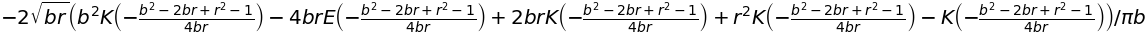

In [4]:
dLdr = simplify(diff(Lambda, r))
dLdr

We claim this simplifies to:

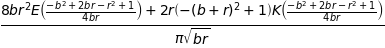

In [5]:
dLdr_paper = (8 * b * r ** 2 * elliptic_e(ksq) + 2 * r * (1 - (b + r) ** 2) * elliptic_k(ksq)) / (pi * sqrt(b * r))
dLdr_paper

Do the expressions agree?

In [6]:
simplify(dLdr_paper - dLdr) == 0

True

<div style="background-color: #f2fcf2; border-color: #b5dfb4; border-left: 5px solid #b5dfb4; padding: 0.5em;">
QED
<div/>

Now, using the relation

$\ \ \ \ \ \ \ \ \ \lambda K(k^2) + q E(k^2) = \mathrm{cel}(k_c, 1, \lambda + q, \lambda + q k_c^2)$

with 

$\ \ \ \ \ \ \ \ \ \lambda = 2 r (1 - (b + r)^2)$ 

and 

$\ \ \ \ \ \ \ \ \ q = 8 b r^2$,

we have

$\ \ \ \ \ \ \ \ \ \lambda + q =$

In [7]:
lam = 2 * r * (1 - (b + r) ** 2)
q = 8 * b * r ** 2
factor(simplify(lam + q))

$=2 r (1 − (b − r)^2 )$

and

$\ \ \ \ \ \ \ \ \ \lambda + q k_c^2 =$

In [8]:
simplify(lam + q * (1 - ksq))

We can then re-write the derivative as

$\frac{1}{\pi \sqrt{b r}} \mathrm{cel}(k_c, 1, 2 r (1 − (b − r)^2 ), 0)$

<div style="background-color: #f2fcf2; border-color: #b5dfb4; border-left: 5px solid #b5dfb4; padding: 0.5em;">
QED
<div/>

### Derivative with respect to $b$

The derivative of this expression with respect to $b$ is

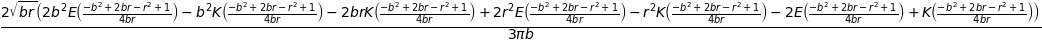

In [9]:
dLdb = simplify(diff(Lambda, b))
dLdb

We claim this simplifies to:

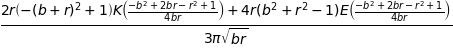

In [10]:
dLdb_paper = (4 * r * (r ** 2 + b ** 2 - 1) * elliptic_e(ksq) + 2 * r * (1 - (b + r) ** 2) * elliptic_k(ksq)) / (3 * pi * sqrt(b * r))
dLdb_paper

Do the expressions agree?

In [11]:
simplify(dLdb_paper - dLdb) == 0

True

<div style="background-color: #f2fcf2; border-color: #b5dfb4; border-left: 5px solid #b5dfb4; padding: 0.5em;">
QED
<div/>

Now, using the relation

$\ \ \ \ \ \ \ \ \ \lambda K(k^2) + q E(k^2) = \mathrm{cel}(k_c, 1, \lambda + q, \lambda + q k_c^2)$

with 

$\ \ \ \ \ \ \ \ \ \lambda = \frac{2r(1 - (b + r)^2)}{1 - (b - r)^2}$

and 

$\ \ \ \ \ \ \ \ \ q = \frac{4r(r^2 + b^2 - 1)}{1 - (b - r)^2}$

we have

$\ \ \ \ \ \ \ \ \ \lambda + q =$

In [12]:
lam = 2 * r * (1 - (b + r) ** 2) / (1 - (b - r) ** 2)
q = 4 * r * (r ** 2 + b ** 2 - 1) / (1 - (b - r) ** 2)
factor(simplify(lam + q))

and

$\ \ \ \ \ \ \ \ \ \lambda + q k_c^2 =$

In [13]:
factor(simplify(lam + q * (1 - ksq)))

$=\frac{1 - (b + r)^2}{b}$

We can then re-write the derivative as

$\frac{1 - (b - r)^2}{3\pi \sqrt{b r}} \mathrm{cel}(k_c, 1, -2r, \frac{1 - (b + r)^2}{b})$

<div style="background-color: #f2fcf2; border-color: #b5dfb4; border-left: 5px solid #b5dfb4; padding: 0.5em;">
QED
<div/>

## $k^2$ > 1

Here's the expression from the paper, in terms of the standard elliptic integrals $E$, $K$, and $\Pi$ (which `sympy` knows how to compute):

In [14]:
f1 = 2 / (9 * pi)
f2 = 1 - (r + b) ** 2
f3 = sqrt(1 - (b - r) ** 2)
f4 = 3 * (b - r) / ((b + r) * sqrt(1 - (b - r) ** 2))
f5 = -sqrt(1 - (b - r) ** 2) * (4 - 7 * r ** 2 - b ** 2)
K = elliptic_k(1 / ksq)
E = elliptic_e(1 / ksq)
PI = elliptic_pi(1 / (ksq * (b + r) ** 2), 1 / ksq)
Lambda = f1 * (f2 * (f3 * K + f4 * PI) + f5 * E)
Lambda

  ⎛⎛                                                            ⎛             
  ⎜⎜                                               (3⋅b - 3⋅r)⋅Π⎜─────────────
  ⎜⎜   ________________                                         ⎜       2 ⎛   
  ⎜⎜  ╱          2       ⎛        4⋅b⋅r        ⎞                ⎝(b + r) ⋅⎝- b
2⋅⎜⎜╲╱  - (b - r)  + 1 ⋅K⎜─────────────────────⎟ + ───────────────────────────
  ⎜⎜                     ⎜   2            2    ⎟                              
  ⎜⎜                     ⎝- b  + 2⋅b⋅r - r  + 1⎠                              
  ⎝⎝                                                                    (b + r
──────────────────────────────────────────────────────────────────────────────
                                                                              

4⋅b⋅r              │        4⋅b⋅r        ⎞⎞                                   
───────────────────│─────────────────────⎟⎟                                   
2            2    ⎞│   2            2    ⎟⎟        

### Derivative with respect to $r$

The derivative of this expression with respect to $r$ is

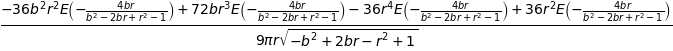

In [15]:
dLdr = simplify(diff(Lambda, r))
dLdr

We claim this simplifies to:

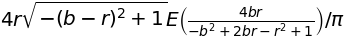

In [16]:
dLdr_paper = 4 * r / pi * sqrt(1 - (b - r) ** 2) * elliptic_e(1 / ksq)
dLdr_paper

Do the expressions agree?

In [17]:
simplify(dLdr_paper - dLdr) == 0

True

<div style="background-color: #f2fcf2; border-color: #b5dfb4; border-left: 5px solid #b5dfb4; padding: 0.5em;">
QED
<div/>

Now, using the relation

$\ \ \ \ \ \ \ \ \ E(m_k) = \mathrm{cel}(k_c,1,1,1 − m_k)$

the derivative may be written as

$\ \ \ \ \ \ \ \ \ \frac{4 r}{\pi} \sqrt{1 - (b - r)^2} \mathrm{cel}(k_c,1,1,k_c^2)$

<div style="background-color: #f2fcf2; border-color: #b5dfb4; border-left: 5px solid #b5dfb4; padding: 0.5em;">
QED
<div/>

### Derivative with respect to $b$

The derivative of this expression with respect to $b$ is

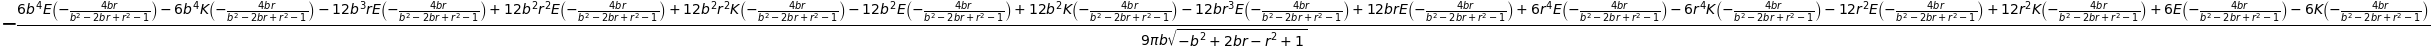

In [18]:
dLdb = simplify(diff(Lambda, b))
dLdb

We claim this simplifies to:

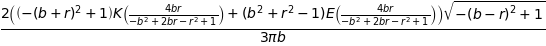

In [19]:
dLdb_paper = 2 / (3 * b * pi) * sqrt(1 - (b - r) ** 2) * ((r ** 2 + b ** 2 - 1) * elliptic_e(1 / ksq) + (1 - (b + r) ** 2) * elliptic_k(1 / ksq))
dLdb_paper

Do the expressions agree?

In [20]:
simplify(dLdb_paper - dLdb) == 0

True

<div style="background-color: #f2fcf2; border-color: #b5dfb4; border-left: 5px solid #b5dfb4; padding: 0.5em;">
QED
<div/>

Now, using the relation

$\ \ \ \ \ \ \ \ \ \lambda K(k^2) + q E(k^2) = \mathrm{cel}(k_c, 1, \lambda + q, \lambda + q k_c^2)$

with 

$\ \ \ \ \ \ \ \ \ \lambda = \frac{1 - (b + r)^2}{2 b r}$

and 

$\ \ \ \ \ \ \ \ \ q = \frac{r^2 + b^2 - 1}{2 b r}$

we have

$\ \ \ \ \ \ \ \ \ \lambda + q =$

In [21]:
lam = (1 - (b + r) ** 2) / (2 * b * r)
q = (r ** 2 + b ** 2 - 1) / (2 * b * r)
factor(simplify(lam + q))

and

$\ \ \ \ \ \ \ \ \ \lambda + q k_c^2 =$

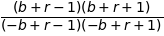

In [22]:
kc2 = (1 - 1 / ksq)
factor(simplify(lam + q * kc2))

$=$

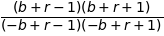

In [23]:
factor(kc2)

$=k_c^2$

We can then re-write the derivative as

$\frac{4 r}{3\pi} \sqrt{1 - (b - r)^2} \mathrm{cel}(k_c, 1, -1, k_c^2)$

<div style="background-color: #f2fcf2; border-color: #b5dfb4; border-left: 5px solid #b5dfb4; padding: 0.5em;">
QED
<div/>

## r = 0

In this case, $\Lambda(r, b) = 0$, so the derivatives are trivially equal to zero.

<div style="background-color: #f2fcf2; border-color: #b5dfb4; border-left: 5px solid #b5dfb4; padding: 0.5em;">
QED
<div/>

## |r - b| $\ge$ 1

Same here. The derivatives are just zero.

<div style="background-color: #f2fcf2; border-color: #b5dfb4; border-left: 5px solid #b5dfb4; padding: 0.5em;">
QED
<div/>

## b = 0

In [24]:
Lambda = -Rational(2, 3) * (1 - r ** 2) ** Rational(3, 2)

The expression for lambda is

In [25]:
Lambda

The derivative with respect to $r$ is

In [26]:
diff(Lambda, r)

The expression for $\Lambda$ does not depend on $b$, so the derivative with respect to $b$ is zero.

<div style="background-color: #f2fcf2; border-color: #b5dfb4; border-left: 5px solid #b5dfb4; padding: 0.5em;">
QED
<div/>

## b = r < 1/2

Let's differentiate the expression for $k^2 > 1$ and substitute $b = r$:

In [27]:
dLdr_paper = 4 * r / pi * sqrt(1 - (b - r) ** 2) * elliptic_e(1 / ksq)
simplify(dLdr_paper.subs({"b": r}))

<div style="background-color: #f2fcf2; border-color: #b5dfb4; border-left: 5px solid #b5dfb4; padding: 0.5em;">
QED
<div/>

Let's do the same for the $b$ derivative:

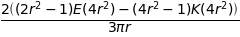

In [28]:
dLdb_paper = 2 / (3 * b * pi) * sqrt(1 - (b - r) ** 2) * ((r ** 2 + b ** 2 - 1) * elliptic_e(1 / ksq) + (1 - (b + r) ** 2) * elliptic_k(1 / ksq))
simplify(dLdb_paper.subs({"b": r}))

Now, using the relation

$\ \ \ \ \ \ \ \ \ \lambda K(k^2) + q E(k^2) = \mathrm{cel}(k_c, 1, \lambda + q, \lambda + q k_c^2)$

with 

$\ \ \ \ \ \ \ \ \ \lambda = -2 + \frac{1}{2 r ^ 2}$ 

and 

$\ \ \ \ \ \ \ \ \ q = 1 -  \frac{1}{2 r ^ 2}$,

we have

$\ \ \ \ \ \ \ \ \ \lambda + q =$

In [29]:
lam = -2 + 1 / (2 * r ** 2)
q = 1 - 1 / (2 * r ** 2)
factor(simplify(lam + q))

and

$\ \ \ \ \ \ \ \ \ \lambda + q k_c^2 =$

In [30]:
kc2 = (1 - 1 / ksq).subs({"b": r})
simplify(factor(simplify(lam + q * kc2)))

$=$

In [31]:
1 - (kc2 - 1) * (kc2 - 1)

$= 1 - (1 - k_c^2)^2$

<div style="background-color: #fcf2f2; border-color: #dFb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
This is not equal to $k_c^2$!
<div/>

## b = r > 1/2

Let's differentiate the expression for $k^2 < 1$ and substitute $b = r$:

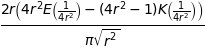

In [32]:
dLdr_paper = (8 * b * r ** 2 * elliptic_e(ksq) + 2 * r * (1 - (b + r) ** 2) * elliptic_k(ksq)) / (pi * sqrt(b * r))
simplify(dLdr_paper.subs({"b": r}))

Now, using the relation

$\ \ \ \ \ \ \ \ \ \lambda K(k^2) + q E(k^2) = \mathrm{cel}(k_c, 1, \lambda + q, \lambda + q k_c^2)$

with 

$\ \ \ \ \ \ \ \ \ \lambda = -(4 r ^ 2 - 1)$ 

and 

$\ \ \ \ \ \ \ \ \ q = 4 r ^ 2$,

we have

$\ \ \ \ \ \ \ \ \ \lambda + q =$

In [33]:
lam = -(4 * r ** 2 - 1)
q = 4 * r ** 2
factor(simplify(lam + q))

and

$\ \ \ \ \ \ \ \ \ \lambda + q k_c^2 =$

In [34]:
kc2 = (1 - ksq).subs({"b": r})
simplify(factor(simplify(lam + q * kc2)))

We can then re-write the derivative as

$\frac{2}{\pi} \mathrm{cel}(k_c, 1, 1, 0)$

<div style="background-color: #f2fcf2; border-color: #b5dfb4; border-left: 5px solid #b5dfb4; padding: 0.5em;">
QED
<div/>

Let's do the same for the $b$ derivative:

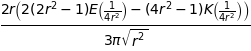

In [35]:
dLdb_paper = (4 * r * (r ** 2 + b ** 2 - 1) * elliptic_e(ksq) + 2 * r * (1 - (b + r) ** 2) * elliptic_k(ksq)) / (3 * pi * sqrt(b * r))
simplify(dLdb_paper.subs({"b": r}))

Now, using the relation

$\ \ \ \ \ \ \ \ \ \lambda K(k^2) + q E(k^2) = \mathrm{cel}(k_c, 1, \lambda + q, \lambda + q k_c^2)$

with 

$\ \ \ \ \ \ \ \ \ \lambda = 4r^2 - 1$ 

and 

$\ \ \ \ \ \ \ \ \ q = -2(2r^2 - 1)$,

we have

$\ \ \ \ \ \ \ \ \ \lambda + q =$

In [36]:
lam = (4 * r ** 2 - 1)
q = -2 * (2 * r ** 2 - 1)
factor(simplify(lam + q))

and

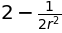

In [37]:
kc2 = (1 - ksq).subs({"b": r})
simplify(factor(simplify(lam + q * kc2)))

$=$

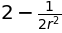

In [38]:
2 * kc2

We can then re-write the derivative as

$-\frac{2}{3\pi} \mathrm{cel}(k_c, 1, 1, 2k_c^2)$

<div style="background-color: #f2fcf2; border-color: #b5dfb4; border-left: 5px solid #b5dfb4; padding: 0.5em;">
QED
<div/>

## b + r = 1

Let's differentiate the expression for $k^2 > 1$ and substitute $b = 1 - r$:

In [39]:
dLdr_paper = 4 * r / pi * sqrt(1 - (b - r) ** 2) * elliptic_e(1 / ksq)

In [40]:
simplify(dLdr_paper.subs({"b": 1 - r}))

<div style="background-color: #f2fcf2; border-color: #b5dfb4; border-left: 5px solid #b5dfb4; padding: 0.5em;">
QED
<div/>

Let's do the same for the $b$ derivative:

In [41]:
dLdb_paper = 2 / (3 * b * pi) * sqrt(1 - (b - r) ** 2) * ((r ** 2 + b ** 2 - 1) * elliptic_e(1 / ksq) + (1 - (b + r) ** 2) * elliptic_k(1 / ksq))

In [42]:
simplify(dLdb_paper.subs({"b": 1 - r}))

<div style="background-color: #f2fcf2; border-color: #b5dfb4; border-left: 5px solid #b5dfb4; padding: 0.5em;">
QED
<div/>

## b = r = 1/2

This is a special case of $b + r = 1$. The derivative with respect to $r$ is thus

In [43]:
simplify((8 * r * sqrt(r * (-r + 1)) / pi).subs({"r": Rational(1, 2)}))

<div style="background-color: #f2fcf2; border-color: #b5dfb4; border-left: 5px solid #b5dfb4; padding: 0.5em;">
QED
<div/>

The derivative with respect to $b$ is

In [44]:
simplify((-8 * r * sqrt(r * (-r + 1)) / (3 * pi)).subs({"r": Rational(1, 2)}))

<div style="background-color: #f2fcf2; border-color: #b5dfb4; border-left: 5px solid #b5dfb4; padding: 0.5em;">
QED
<div/>